In [ ]:
!pip install LightGBM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('MonkeyPox.csv')
df.head()

,Patient_ID,Systemic_Illness,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic_Illness                18784 non-null  object
 2   Rectal_Pain                     25000 non-null  bool  
 3   Sore_Throat                     25000 non-null  bool  
 4   Penile_Oedema                   25000 non-null  bool  
 5   Oral_Lesions                    25000 non-null  bool  
 6   Solitary_Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Systemic_Illness,6216
Rectal_Pain,0
Sore_Throat,0
Penile_Oedema,0
Oral_Lesions,0
Solitary_Lesion,0
Swollen Tonsils,0
HIV Infection,0
Sexually Transmitted Infection,0


In [ ]:
#Mengubah none(nilai kosong) -> none (tidak ada gejala)
df['Systemic_Illness'] = df['Systemic_Illness'].fillna("None")

In [ ]:
df['Systemic_Illness'].value_counts() # Cek distribusi nilai

,count
Systemic_Illness,
Fever,6382
Swollen Lymph Nodes,6252
None,6216
Muscle Aches and Pain,6150


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Systemic_Illness,0
Rectal_Pain,0
Sore_Throat,0
Penile_Oedema,0
Oral_Lesions,0
Solitary_Lesion,0
Swollen Tonsils,0
HIV Infection,0
Sexually Transmitted Infection,0


In [ ]:
#membagi fitur
X = df.drop(['Patient_ID', 'Rectal_Pain', 'Sore_Throat', 'MonkeyPox'], axis=1)
y = df['MonkeyPox']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic_Illness                25000 non-null  object
 1   Penile_Oedema                   25000 non-null  bool  
 2   Oral_Lesions                    25000 non-null  bool  
 3   Solitary_Lesion                 25000 non-null  bool  
 4   Swollen Tonsils                 25000 non-null  bool  
 5   HIV Infection                   25000 non-null  bool  
 6   Sexually Transmitted Infection  25000 non-null  bool  
dtypes: bool(6), object(1)
memory usage: 341.9+ KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: MonkeyPox
Non-Null Count  Dtype 
--------------  ----- 
25000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y.dtype)

int64


In [ ]:
#get dummies
X = pd.get_dummies(X)
X.head()

,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic_Illness_Fever,Systemic_Illness_Muscle Aches and Pain,Systemic_Illness_None,Systemic_Illness_Swollen Lymph Nodes
0,True,True,False,True,False,False,False,False,True,False
1,True,True,False,False,True,False,True,False,False,False
2,True,False,False,False,True,False,True,False,False,False
3,False,False,True,True,True,False,False,False,True,False
4,True,False,False,True,True,False,False,False,False,True


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Penile_Oedema                           25000 non-null  bool 
 1   Oral_Lesions                            25000 non-null  bool 
 2   Solitary_Lesion                         25000 non-null  bool 
 3   Swollen Tonsils                         25000 non-null  bool 
 4   HIV Infection                           25000 non-null  bool 
 5   Sexually Transmitted Infection          25000 non-null  bool 
 6   Systemic_Illness_Fever                  25000 non-null  bool 
 7   Systemic_Illness_Muscle Aches and Pain  25000 non-null  bool 
 8   Systemic_Illness_None                   25000 non-null  bool 
 9   Systemic_Illness_Swollen Lymph Nodes    25000 non-null  bool 
dtypes: bool(10)
memory usage: 244.3 KB


In [ ]:
X

,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic_Illness_Fever,Systemic_Illness_Muscle Aches and Pain,Systemic_Illness_None,Systemic_Illness_Swollen Lymph Nodes
0,True,True,False,True,False,False,False,False,True,False
1,True,True,False,False,True,False,True,False,False,False
2,True,False,False,False,True,False,True,False,False,False
3,False,False,True,True,True,False,False,False,True,False
4,True,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
24995,False,True,True,False,False,True,False,False,True,False
24996,True,False,True,True,True,True,True,False,False,False
24997,False,False,True,True,False,False,False,False,True,False
24998,False,True,True,True,False,False,False,False,False,True


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20000, 10)
(5000, 10)
(20000,)
(5000,)


In [ ]:
#modelling
model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754


LGBMClassifier()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.31      0.41      1754
           1       0.70      0.89      0.79      3246

    accuracy                           0.69      5000
   macro avg       0.65      0.60      0.60      5000
weighted avg       0.67      0.69      0.65      5000



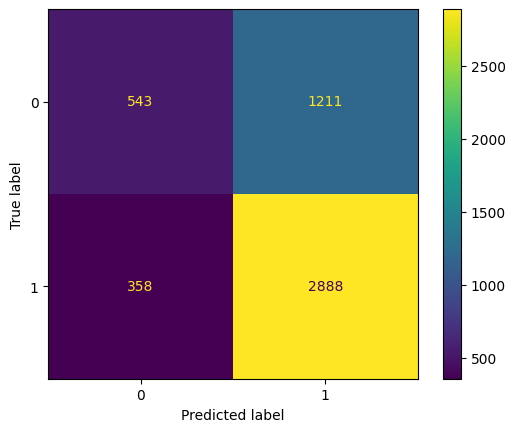

In [ ]:
#visualisasi
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
#simpan model
import pickle
pickle.dump(model, open('MP.pkl', 'wb'))